In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('/content/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
data.describe

<bound method NDFrame.describe of        Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0        

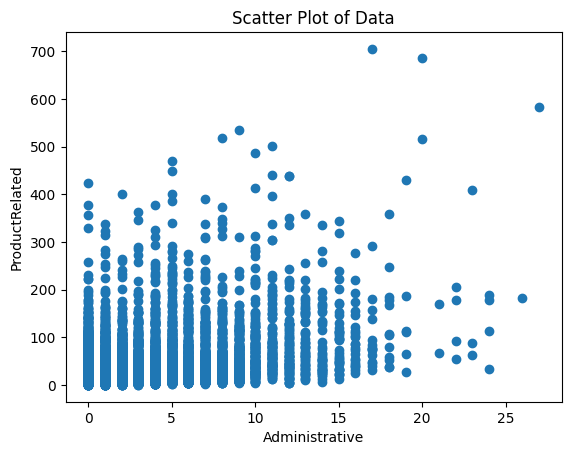

In [7]:
plt.scatter(x=data['Administrative'], y=data['ProductRelated'])
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title('Scatter Plot of Data')
plt.show()

In [8]:
columns = ['Administrative', 'ProductRelated']

In [11]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=2)
    kmeans.fit(data[columns])
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

#**Elbow Method**

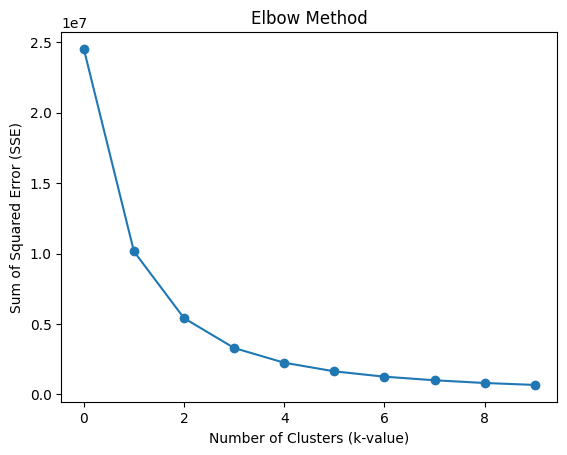

In [18]:
plt.plot( sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k-value)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

according to elbow method optimal value of k is 8

In [19]:
k_val = 8

#**K Means Clustering**

In [21]:
kmeans = KMeans(n_clusters=k_val, random_state=2)
kmeans.fit(data[columns])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=2)

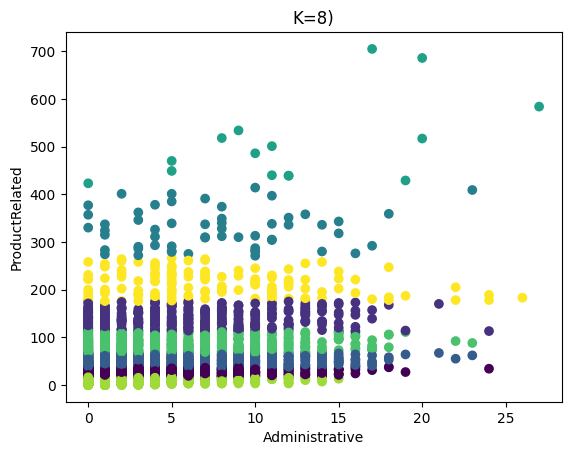

In [23]:
data['KMeans_Optimal'] = kmeans.labels_

plt.scatter(x=data['Administrative'], y=data['ProductRelated'], c=data['KMeans_Optimal'], cmap='viridis')
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title(f'K={k_val})')
plt.show()

#**Silhouette score**

silhouette score is a metric used to evaluate the quality of clusters formed by a clustering algorithm. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation)

In [24]:
silhouette_kmeans = silhouette_score(data[columns], kmeans.labels_)
print(f'Silhouette Score for K-Means Clustering: {silhouette_kmeans}')

Silhouette Score for K-Means Clustering: 0.5462969897552381


#**Hierarchical Clustering**

In [25]:
data_hierachichal = StandardScaler().fit_transform(data[columns])
linkage_matrix = linkage(data_hierachichal, method='ward')

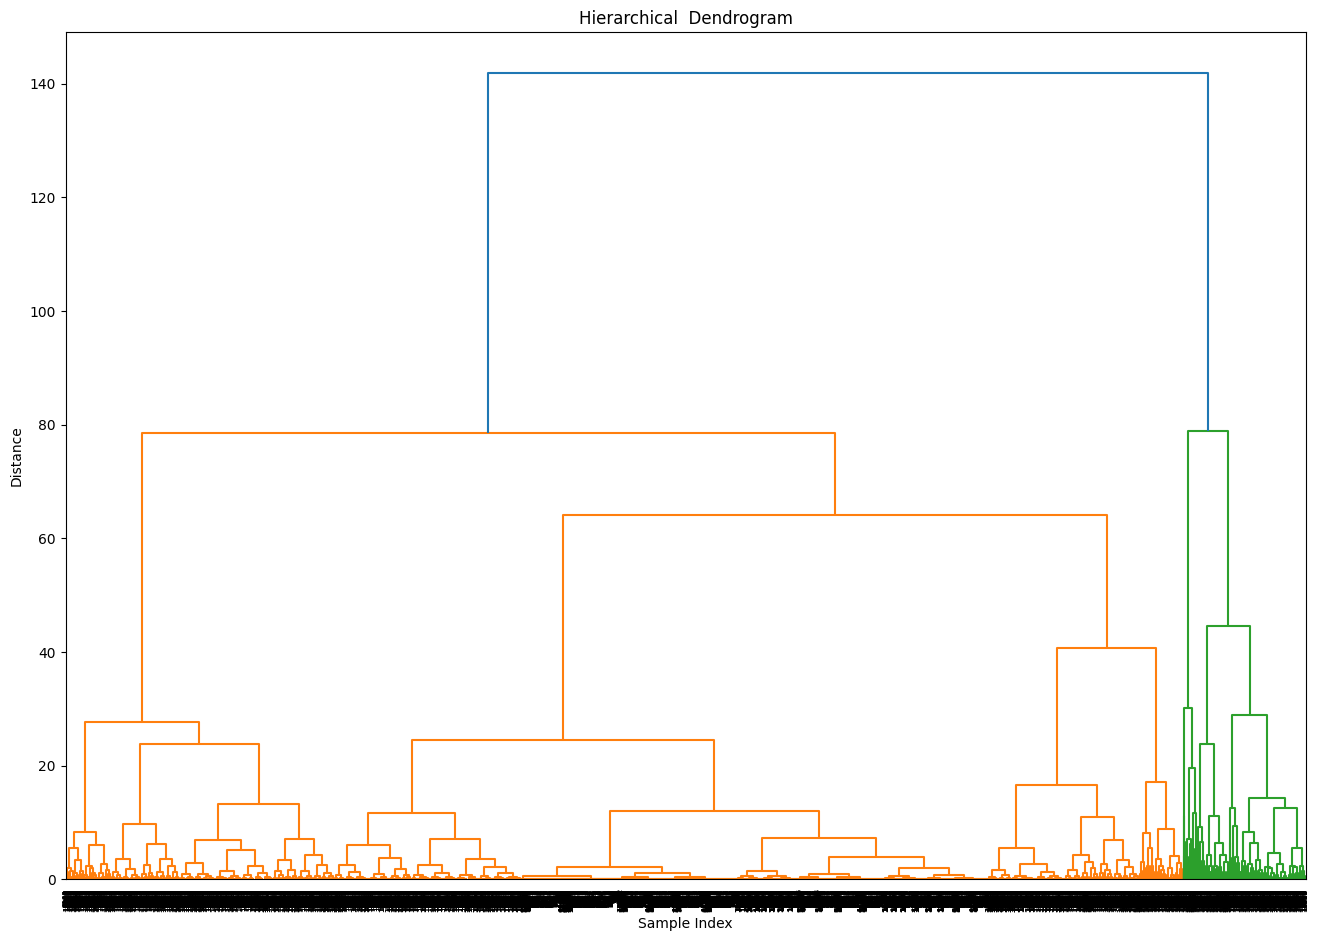

In [26]:
plt.figure(figsize=(16, 11))
dendrogram(linkage_matrix)
plt.title('Hierarchical  Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [27]:
clus = 3

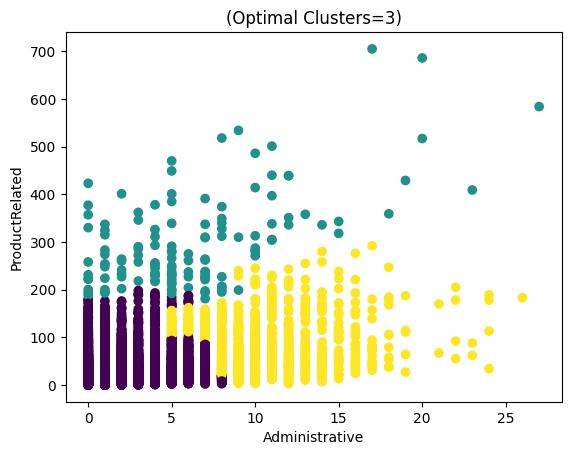

In [29]:
hierarchical_clusters = fcluster(linkage_matrix, clus, criterion='maxclust')
data['Hierarchical_Clusters'] = hierarchical_clusters

plt.scatter(x=data['Administrative'], y=data['ProductRelated'], c=data['Hierarchical_Clusters'], cmap='viridis')
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title(f'(Optimal Clusters={clus})')
plt.show()

#**Silhouette score**

pairwise_distances represents the pairwise distances between data points in your dataset. The silhouette score is then calculated based on the cluster assignments obtained from hierarchical clustering.

In [30]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

pairwise_distances = pdist(StandardScaler().fit_transform(data[columns]))
pairwise_distances_square = squareform(pairwise_distances)

if np.isnan(pairwise_distances_square).any():
    raise ValueError("Pairwise distances contain missing values. Handle or remove missing values before proceeding.")

if len(hierarchical_clusters) != len(pairwise_distances_square):
    raise ValueError("Inconsistent numbers of samples between hierarchical_clusters and pairwise_distances_square.")

silhouette_avg_hierarchical = silhouette_score(pairwise_distances_square, hierarchical_clusters)

print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical}')

Silhouette Score for Hierarchical Clustering: 0.6537565997024019
